**Разработка моделей машинного обучения. Создание модели по прогнозированию удоя коровы и модели по получению вкусного молока**

Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».


Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. 


Для этого необходимо разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. 

Требуется создать две прогнозируемых модели:
- первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).


С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.


Для выполнения работы нужно выполнить следующие основные задачи:
- загрузить данные;
- выполнить предобработку данных;
- провести исследовательский анализ данных;
- провести корреляционный анализ;
- обучить модели линейной регрессии;
- обучить модель логистической регрессии;
- написать общий вывод.

В ходе предоботки данных потребуется проверить данные на наличие пропусков, дубликатов и проверить типы данных, устанить все проблемы.

Во время выполнения исследовательского анализ необходимо провести статистический анализ всех признаков. Построить графики для каждого признака.

Для проведения корреляционного анализа потребуется изучить взаимосвязь между признакми (рассчитать коэффициенты корреляции). Построить диаграммы рассеяния.

Для выполнения задачи регресии нужно построить три модели простой линейной регрессии, выбрать лучшую модель.

Чтобы решить задачу классификации, потребуется создать модель логистической регрессии.

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, recall_score, precision_score, \
    accuracy_score, confusion_matrix, precision_recall_curve

#### Шаг 1. Загрузка данных

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним его в датафрейм

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

##### Изучим информацию о датафреймах

In [3]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_main.head()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Для того, чтобы таблицы соответствовали стандартам оформления потребуется привести названия столбцов к нижнему регистру, а также переимновать некоторые из них.

In [4]:
new_columns = {
   "id": "id",
    "удой, кг": "milk_yield_kg",
   "эке (энергетическая кормовая единица)": "energy_feed_unit",
   "сырой протеин, г": "crude_protein_g",
   "спо (сахаро-протеиновое соотношение)": "sugar_protein_ratio",
   "порода": "breed",
   "тип пастбища": "pasture_type",
   "порода папы_быка": "sire_breed",
   "жирность,%": "fat_percent",
   "белок,%": "protein_percent",
   "вкус молока": "milk_taste",
   "возраст": "age"
}

ferma_main.rename(columns=new_columns, inplace=True)
ferma_main.head()

,id,milk_yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [5]:
#ferma_main.columns = [
#    re.sub(r'[^\w\s]', '', col)  
#    .replace(' ', '_')           
#    .lower()                     
#    for col in ferma_main.columns
#]

#ferma_main.head()

In [6]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield_kg        634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   crude_protein_g      634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   sire_breed           634 non-null    object 
 8   fat_percent          634 non-null    float64
 9   protein_percent      634 non-null    float64
 10  milk_taste           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [7]:
ferma_dad.columns = ferma_dad.columns.str.lower()
ferma_dad.head()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
new_columns = {
    'id':'id',
    'имя папы':'sire_name'
}

ferma_dad.rename(columns=new_columns, inplace=True)
ferma_dad.head()

,id,sire_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [9]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         629 non-null    int64 
 1   sire_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [10]:
cow_buy.columns = cow_buy.columns.str.lower()
cow_buy.head(5)

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [11]:
new_columns = {
    "порода": "breed",
    "тип пастбища": "pasture_type",
    "порода папы_быка": "sire_breed",
    "имя_папы": "sire_name",
    "текущая_жирность,%": "current_fat_percent",
    "текущий_уровень_белок,%": "current_protein_percent",
    "возраст": "age"
}

cow_buy.rename(columns=new_columns, inplace=True)
cow_buy.head()

,breed,pasture_type,sire_breed,sire_name,current_fat_percent,current_protein_percent,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [12]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   breed                    20 non-null     object 
 1   pasture_type             20 non-null     object 
 2   sire_breed               20 non-null     object 
 3   sire_name                20 non-null     object 
 4   current_fat_percent      20 non-null     float64
 5   current_protein_percent  20 non-null     float64
 6   age                      20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Названия столбцов были приведены к единому виду, пропущенных значений в датафреймах обнаружено не было. Типы данных верны.**

#### Шаг 2. Предобработка данных

##### Проверим на наличие пропусков и дубликатов

In [13]:
def skips_dulicates(data):
    total_missing = data.isna().sum().sum()
    if total_missing > 0:
        print(f"Пропуски найдены, общее количество пропусков: {total_missing}")
        print("Пропуски по столбцам:")
        print(data.isna().sum())
    else:
        print("Пропусков нет.")
    duplicate_count = data.duplicated().sum()
    if duplicate_count > 0:
        print(f"Количество явных дубликатов: {duplicate_count}")
    else:
        print("Дубликатов нет.")
    return data

In [14]:
skips_dulicates(ferma_main);

Пропусков нет.
Количество явных дубликатов: 5


Пропусков нет, нужно убрать 5 явных дубликатов.

In [15]:
ferma_main.drop_duplicates(inplace=True)
print('Количество дубликатов после удаления:', ferma_main.duplicated().sum())

Количество дубликатов после удаления: 0


In [16]:
ferma_main['breed'] = ferma_main['breed'].str.lower()
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.lower()
ferma_main['sire_breed'] = ferma_main['sire_breed'].str.lower()
ferma_main['milk_taste'] = ferma_main['milk_taste'].str.lower()
ferma_main['age'] = ferma_main['age'].str.lower()

key_columns = ['milk_yield_kg', 'breed', 'pasture_type', 'sire_breed', 'milk_taste', 'age', 'fat_percent', 'protein_percent']

duplicate_rows = ferma_main[ferma_main.duplicated(subset=key_columns, keep='first')]
print(f"Количество дубликатов: {len(duplicate_rows)}")

ferma_main = ferma_main.drop_duplicates(subset=key_columns, keep='first').reset_index(drop=True)
print(f"Количество записей после удаления дубликатов: {len(ferma_main)}")

Количество дубликатов: 0
Количество записей после удаления дубликатов: 629


In [17]:
ferma_dad = skips_dulicates(ferma_dad)

Пропусков нет.
Дубликатов нет.


In [18]:
cow_buy = skips_dulicates(cow_buy)

Пропусков нет.
Количество явных дубликатов: 4


В cow_buy мало данных, возможно, что они сходятся для разных коров. Поэтому не будем их удалять

##### Проверим на  неявных наличие дубликатов

In [19]:
def unique_values(data):
    unique_dict = {}  
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].str.lower()
            unique_dict[column] = data[column].unique() 
    return unique_dict

In [20]:
unique_values(ferma_main)

{'breed': array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object),
 'pasture_type': array(['равнинное', 'равнинные', 'холмистое'], dtype=object),
 'sire_breed': array(['айдиал', 'соверин', 'айдиалл'], dtype=object),
 'milk_taste': array(['вкусно', 'не вкусно'], dtype=object),
 'age': array(['более_2_лет', 'менее_2_лет'], dtype=object)}

Можно заметить два дубликата:
- Равнинное и Равнинные;
- Айдиал и Айдиалл.

In [21]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace({'равнинные': 'равнинное'})
ferma_main['sire_breed'] = ferma_main['sire_breed'].replace({'айдиалл': 'айдиал'})

In [22]:
unique_values(ferma_dad)

{'sire_name': array(['буйный', 'соловчик', 'барин', 'геркулес'], dtype=object)}

In [23]:
unique_values(cow_buy)

{'breed': array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object),
 'pasture_type': array(['холмистое', 'равнинное'], dtype=object),
 'sire_breed': array(['айдиал', 'соверин'], dtype=object),
 'sire_name': array(['геркулес', 'буйный', 'барин', 'соловчик'], dtype=object),
 'age': array(['более_2_лет', 'менее_2_лет'], dtype=object)}

**В ходе предобработки данных не было обнаруженно пропусков, были найдены и удалены явные и невяные дубликаты в датафрейме ferma_main.**

#### Шаг 3. Исследовательский анализ данных

In [24]:
def num_variable_analysis(data, column, title):
    print(data[column].describe())
    fig, ax = plt.subplots(figsize = (17,2))
    ax = data[[column]].boxplot(vert = False, ax =ax)
    ax.set_title(f'Диаграмма размаха {title}')
    plt.show()

In [25]:
def num_variable_visualization(data, column, title):
    data = data[column].plot(title=title, kind='hist', bins=25, grid=True, 
                                             figsize=(10,6), color='skyblue', edgecolor='black')
    data.set_xlabel(column)
    data.set_ylabel(title)
    plt.show()

In [26]:
def cat_variable_visualization(data, column, title, ax):
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(title, fontsize=14)

##### Изчучим количесвтенные признаки ferma_main

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield_kg, dtype: float64


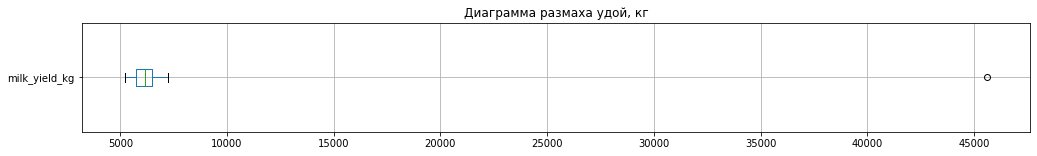

In [27]:
num_variable_analysis(ferma_main, 'milk_yield_kg', 'удой, кг')

Есть анамальное значение удоя - 45616, удалим его.

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield_kg, dtype: float64


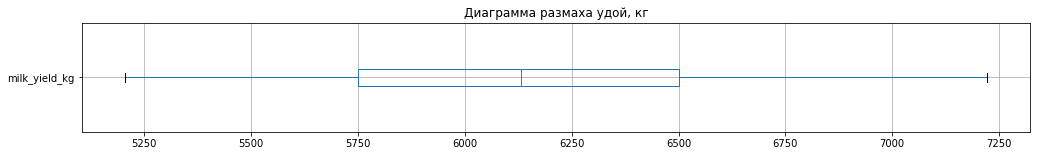

In [28]:
ferma_main = ferma_main[ferma_main['milk_yield_kg'] != 45616]
num_variable_analysis(ferma_main, 'milk_yield_kg', 'удой, кг')

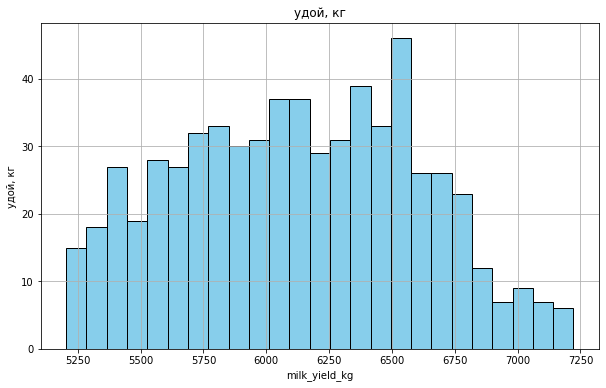

In [29]:
num_variable_visualization(ferma_main, 'milk_yield_kg', 'удой, кг')

Средний удой коров более 6000 кг. Удои распределены достаточно равномерно с небольшим смещением вправо. Наблюдается пик около значения 6500 кг.

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64


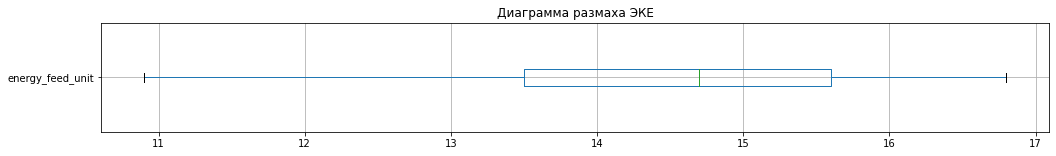

In [30]:
num_variable_analysis(ferma_main, 'energy_feed_unit', 'ЭКЕ')

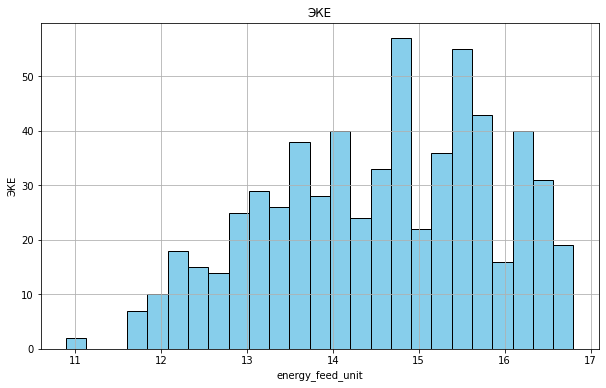

In [31]:
num_variable_visualization(ferma_main, 'energy_feed_unit', 'ЭКЕ')

График смещен вправо, среднее занчении ЭКЕ - 14.5.

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: crude_protein_g, dtype: float64


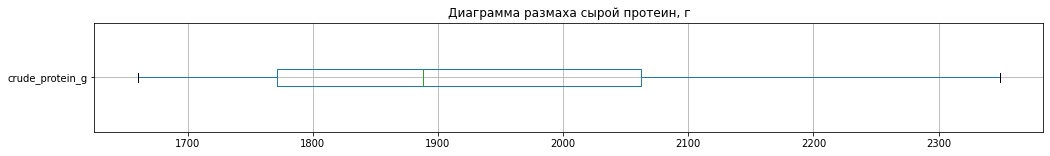

In [32]:
num_variable_analysis(ferma_main, 'crude_protein_g', 'сырой протеин, г')

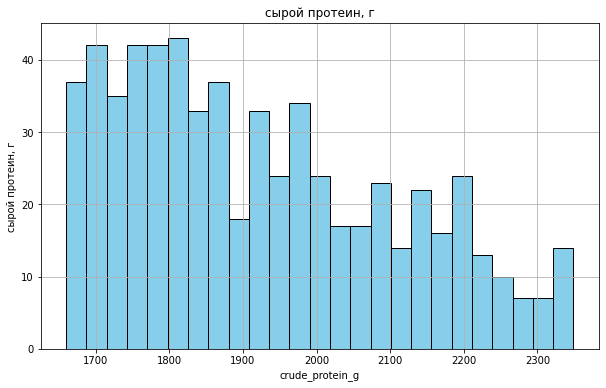

In [33]:
num_variable_visualization(ferma_main, 'crude_protein_g', 'сырой протеин, г')

График смещен влево, среднее значение - 1923 г.

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64


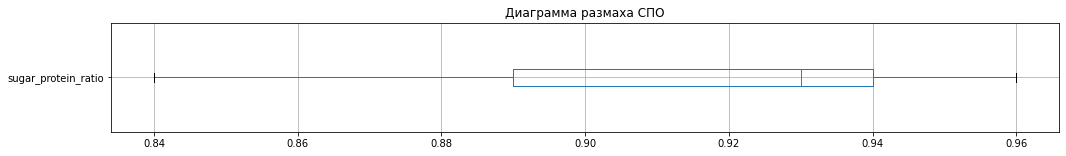

In [34]:
num_variable_analysis(ferma_main, 'sugar_protein_ratio', 'СПО')

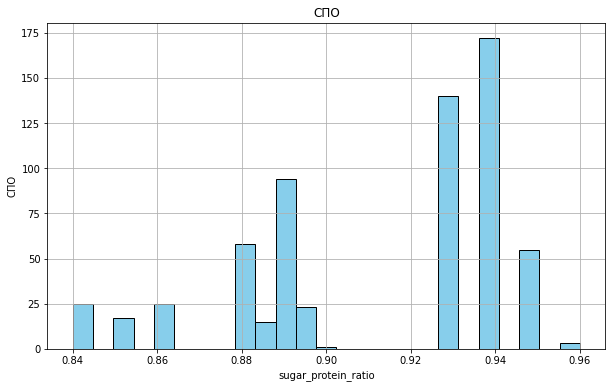

In [35]:
num_variable_visualization(ferma_main, 'sugar_protein_ratio', 'СПО')

Распределение данных асимметрично, смещено в правую сторону (скорее всего это происходит из-за специфики данного признака). Наибольшее количество сосредоточено в диапазоне 0.92–0.94.Диапазон значений отношения сахара к белку варьируется от 0.84 до 0.96.

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_percent, dtype: float64


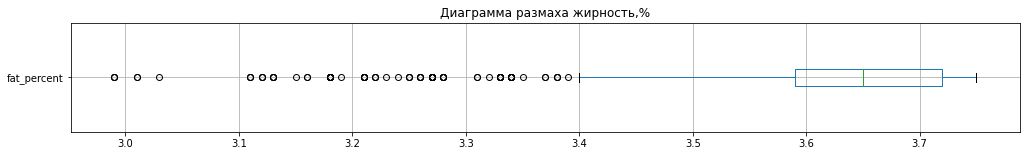

In [36]:
num_variable_analysis(ferma_main, 'fat_percent', 'жирность,%')

In [37]:
print(
    f'Доля строк с выбросами признака "жирность,%": {round(len(ferma_main.query("fat_percent < 3.4")) / len(ferma_main) * 100, 3)}%')


Доля строк с выбросами признака "жирность,%": 13.694%


Доля выбросов слишком велика, если их удалить, пропадет большое количество данных.

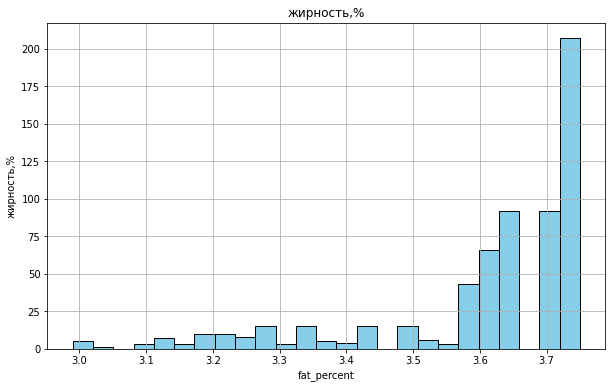

In [38]:
num_variable_visualization(ferma_main, 'fat_percent', 'жирность,%')

Наблюдается сильное смещение вправо (скорее всего это происходит из-за специфики данного признака), среднее значение - 3.6.

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_percent, dtype: float64


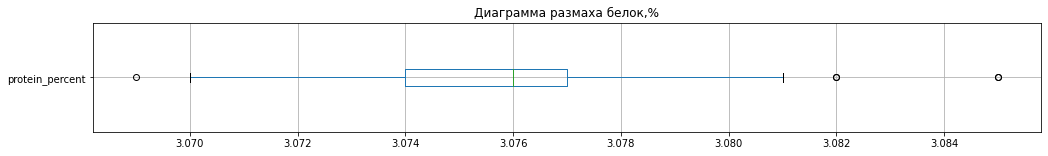

In [39]:
num_variable_analysis(ferma_main, 'protein_percent', 'белок,%')

In [40]:
print(
    f'Доля строк без выбросов признака "белок,%": {round(len(ferma_main.query("3.07< protein_percent <3.081")) / len(ferma_main) * 100, 3)}%')


Доля строк без выбросов признака "белок,%": 95.701%


In [41]:
#ferma_main = ferma_main.query('3.07 < protein_percent < 3.081 ')

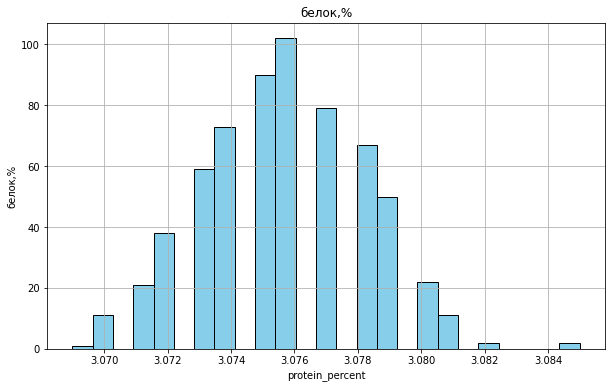

In [42]:
num_variable_visualization(ferma_main, 'protein_percent', 'белок,%')

Распределение примерно симметрично. В среднем процент белка - 3.076.

##### Изучим качественные переменные для ferma_main

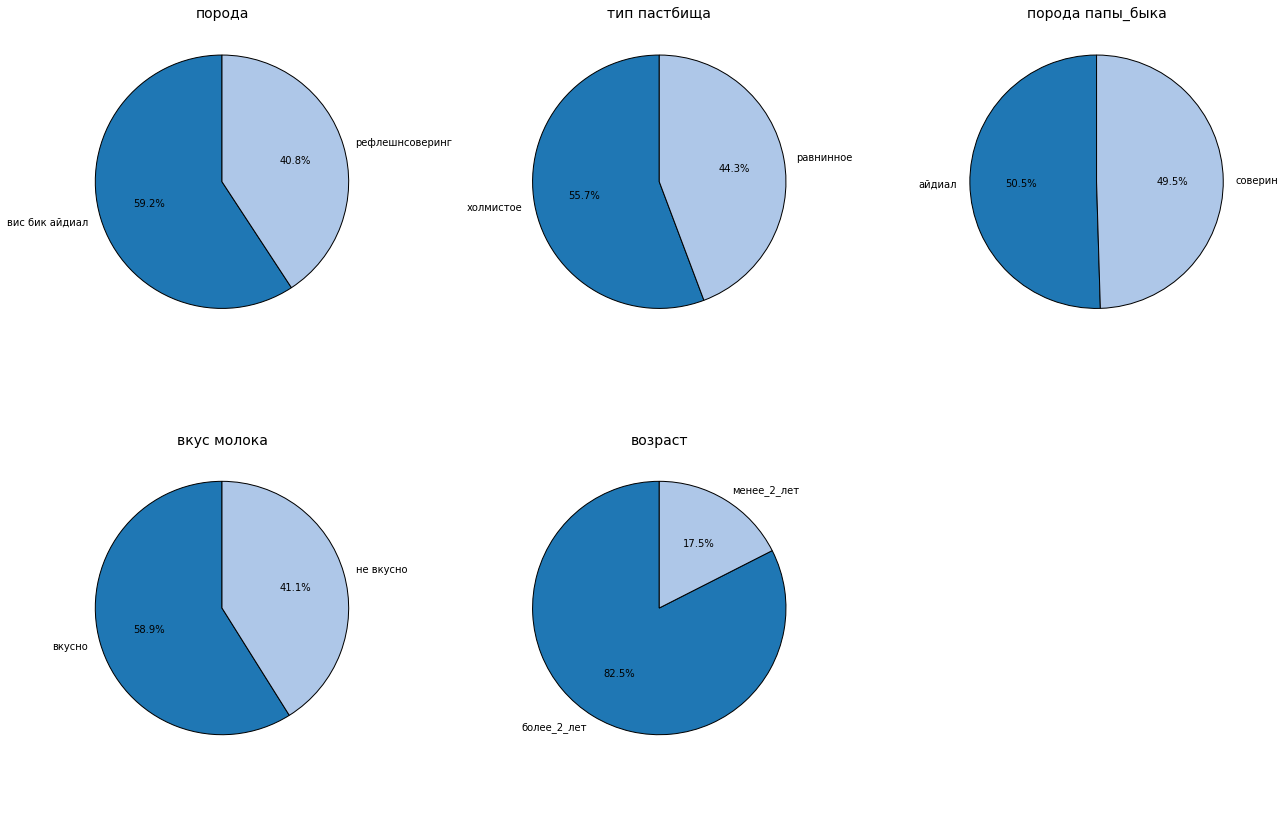

In [43]:
columns = [ 'breed', 'pasture_type', 'sire_breed', 'milk_taste', 'age']  
titles = ['порода', 'тип пастбища', 'порода папы_быка', 'вкус молока', 'возраст']  

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

axes = axes.flatten()

for i, ax in enumerate(axes[:len(columns)]): 
    cat_variable_visualization(ferma_main, columns[i], titles[i], ax)

for ax in axes[len(columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Преобладает порода 'вис бик айдиал', на 18% превосходит другую породу. Типы пастбищ примерно равны, но холмистых больше на 11%. Порода папы_быка распределены одинаково. На 18% больше вкусного молока. Подовляющие большинство коров старше 2 лет.

##### Изучим качественные признаки ferma_dad

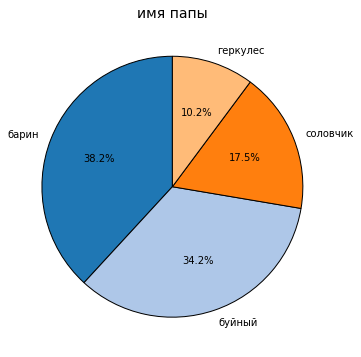

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
cat_variable_visualization(ferma_dad, 'sire_name', 'имя папы', ax)  
plt.show() 

Барин и Буйный составляют 72% от всех.

##### Изучим количественные признаки cow_buy

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: current_fat_percent, dtype: float64


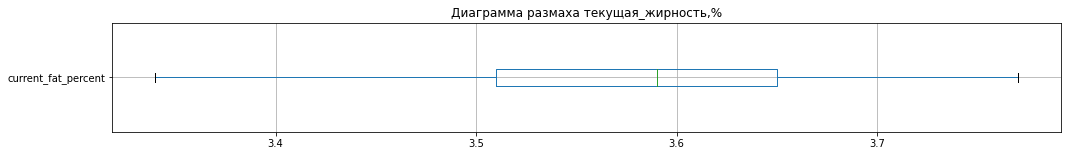

In [45]:
num_variable_analysis(cow_buy, 'current_fat_percent', 'текущая_жирность,%')

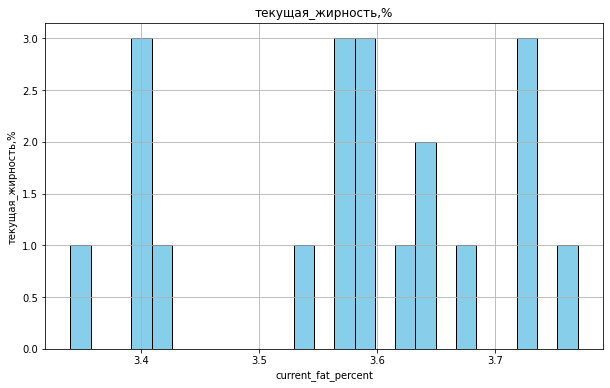

In [46]:
num_variable_visualization(cow_buy, 'current_fat_percent', 'текущая_жирность,%')

Жирность чаще всего наблюдается на уровнях около 3.4%, 3.6% и 3.7%.

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: current_protein_percent, dtype: float64


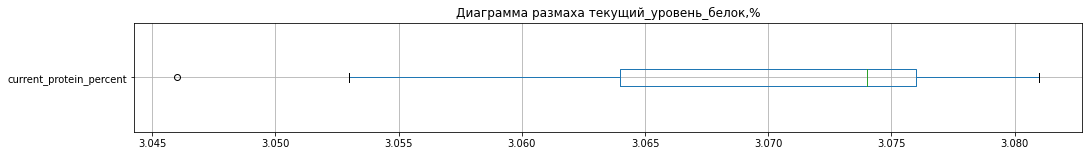

In [47]:
num_variable_analysis(cow_buy, 'current_protein_percent', 'текущий_уровень_белок,%')

Есть один выброс, но так как данных очень мало (20), лучше его оставить.

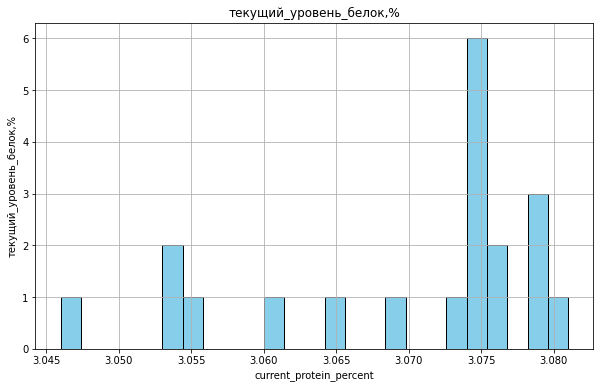

In [48]:
num_variable_visualization(cow_buy,'current_protein_percent', 'текущий_уровень_белок,%')

Распределение смещено вправо, 3.075 - наиболее часто встречающиеся значение.

##### Изучим количственные признаки cow_buy

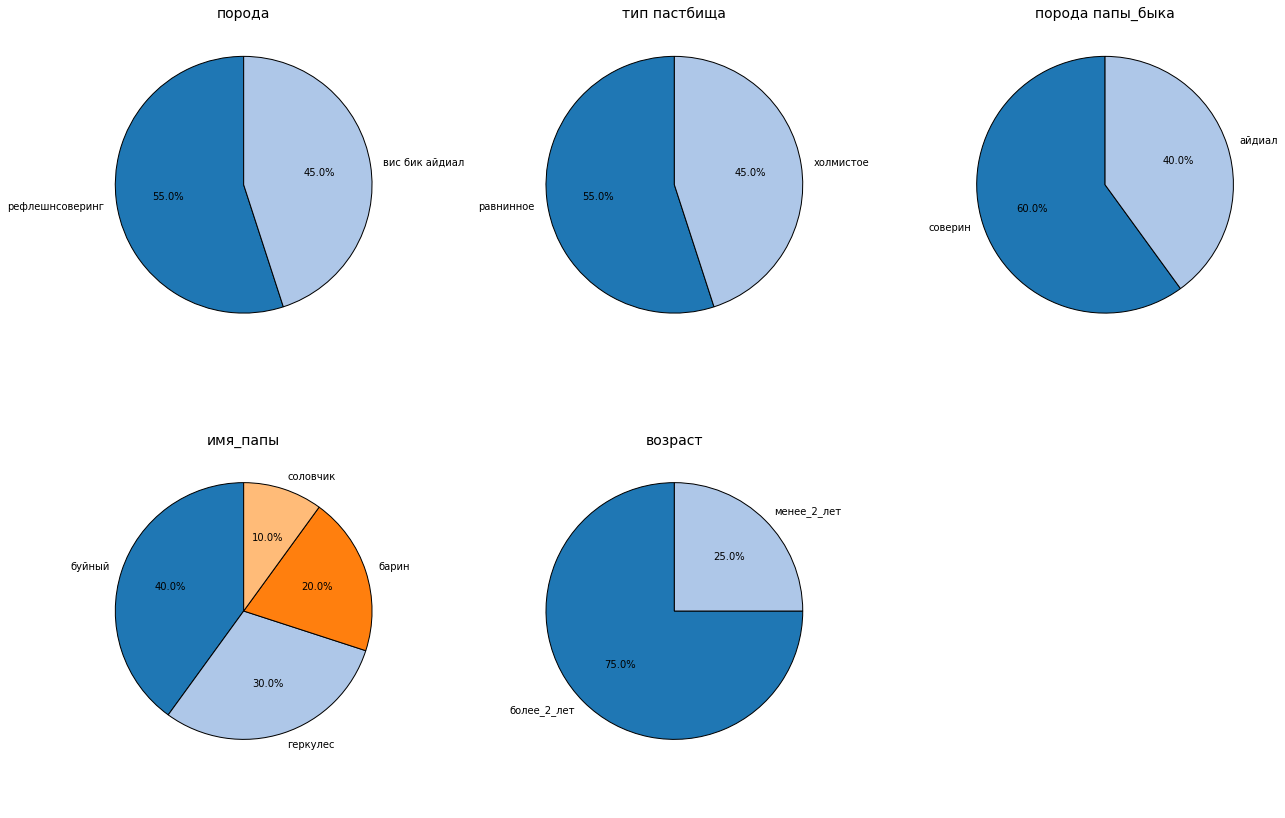

In [49]:
columns = [ 'breed', 'pasture_type', 'sire_breed', 'sire_name', 'age']  
titles = ['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы','возраст']  

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

axes = axes.flatten()

for i, ax in enumerate(axes[:len(columns)]): 
    cat_variable_visualization(cow_buy, columns[i], titles[i], ax)

for ax in axes[len(columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Породы распределены практически равномерно, как и тип пастбища. Порода папы_быка соверин преобладает над айдиал (20% разница). Буйный и Геркулес составляют 70% от всех. Преобладают коровы страше двух лет.

**В целом большинство признаков распределено ненормально, наблюдаются смещения. Было удалено аномальное значение в признаке "удой" и выбросы в признаке "белок".**

#### Шаг 4. Корреляционный анализ

##### Расчетаем коэффициентов корреляции между всеми признаками

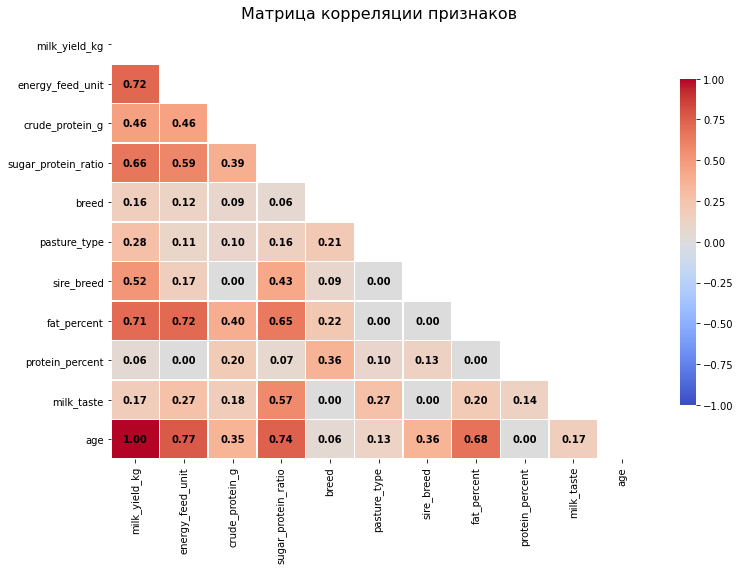

In [50]:
interval_cols = ['milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']
phik_matrix = ferma_main.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)

mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    phik_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    mask=mask,          
    linewidths=0.5,     
    cbar_kws={"shrink": 0.75},  
    vmin=-1, vmax=1,     
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  
)

plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

Так как у нас большое количество категориальных признаков, то была использован коэффициент корреляции Фи. Чем ближе его значение по модулю к 1, тем сильнее связь.

##### Построим диаграммы рассеяния для признака удой, кг и всех количественных признаков 

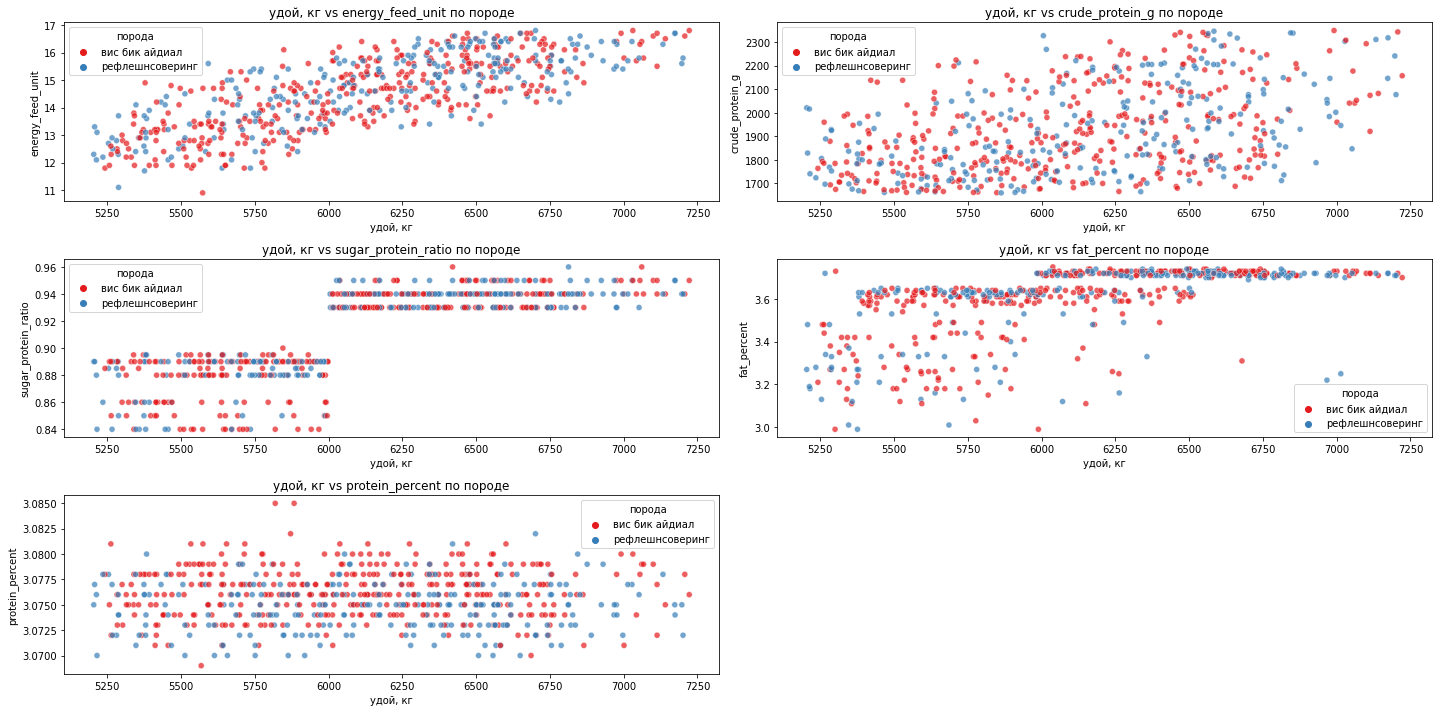

In [51]:
num_scatter = ['energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(num_scatter, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=ferma_main, x='milk_yield_kg', y=feature, hue='breed', alpha=0.7, palette='Set1')
    plt.title(f'удой, кг vs {feature} по породе')
    plt.xlabel('удой, кг')
    plt.ylabel(feature)
    plt.legend(title='порода')

plt.tight_layout() 
plt.show()

**Удой - целевой признак, опишем корреляцию между ним и другими признаками:**

- возраст: коэффицент корреляции = 1, очень сильная связь;
- ЭКЕ: сильная зависимость, с увеличением "удоя" постепенно увеличивается и ЭКЕ. Это справедливо для обеих пород;
- жирность: сильная положительная зависимость;
- СПО: есть зависимость с целевым признаком, на диаграмме рассеяния заметен разброс разброс значений на две группы (удой до 6000 кг - СПО < 0.9, удой больше 6000 кг - СПО > 0.93);
- сырой протеин: связь умеренно положительная, на  диаграмме рассеяния виден довольно большой разброс значений;
- белок: слабая корреляция;
- порода папы_быка: умеренная корреляция. 

**В основном связь между признаками линейная, нет необходимости в добалении новых признаков. Стоит обратить внимание на СПО, так как там наблюдается нелиненая связь. Из корреляционной матрицы следует, что нет признаков сильной мультиколлинеарности.**

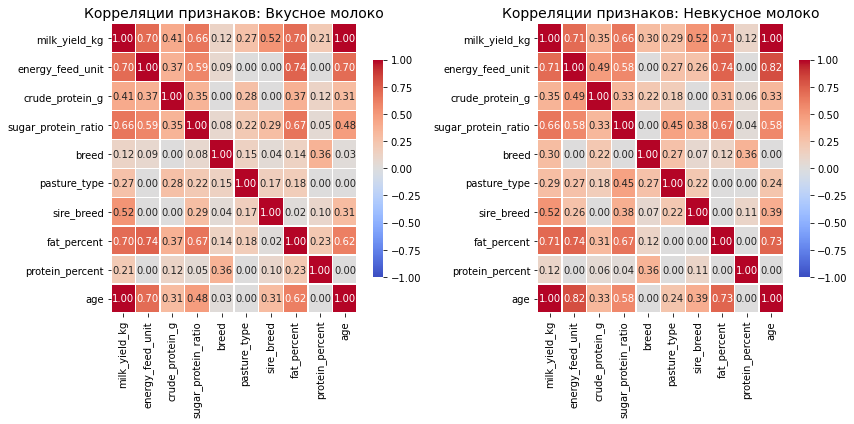

In [52]:
interval_cols = ['milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 
                 'sugar_protein_ratio', 'fat_percent', 'protein_percent']


tasty_milk = ferma_main[ferma_main['milk_taste'] == 'вкусно']
not_tasty_milk = ferma_main[ferma_main['milk_taste'] == 'не вкусно']


correlation_tasty = tasty_milk.drop(['id', 'milk_taste'], axis=1).phik_matrix(interval_cols=interval_cols)
correlation_not_tasty = not_tasty_milk.drop(['id', 'milk_taste'], axis=1).phik_matrix(interval_cols=interval_cols)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.heatmap(
    correlation_tasty,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    vmin=-1,
    vmax=1
)
plt.title("Корреляции признаков: Вкусное молоко", fontsize=14)


plt.subplot(1, 2, 2)
sns.heatmap(
    correlation_not_tasty,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    vmin=-1,
    vmax=1
)
plt.title("Корреляции признаков: Невкусное молоко", fontsize=14)

plt.tight_layout()
plt.show()

#### Шаг 5. Обучение модели линейной регрессии

#####  Модель №1

Нужно исключить признак 'id', так как он уникален для каждой коровы. Кроме этого стоит убрать 'белок', связь с целевым признаком слаба. Уберем 'жирность', данные показатель влиет на само молоко, а не на его количество, напрямую не связан с целевой переменной. 'milk_taste' уберем по такой же причине.

In [53]:
ferma_m = ferma_main.drop(['id', 'protein_percent', 'fat_percent', 'milk_taste'], axis=1)
ferma_m.head(1)

,milk_yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,age
0,5863,14.2,1743,0.89,вис бик айдиал,равнинное,айдиал,более_2_лет


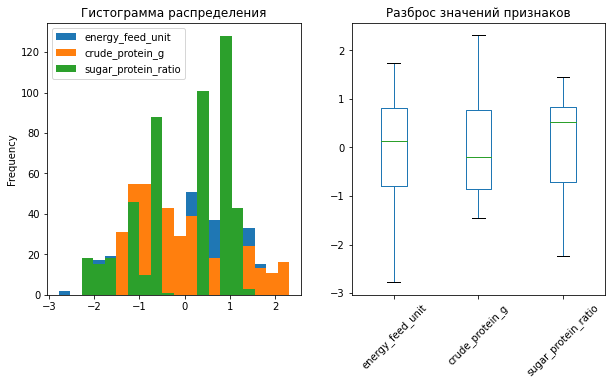

In [54]:
# Разабъем выборку на тренировочную и тестовую
RANDOM_STATE = 42

X = ferma_m.drop(columns='milk_yield_kg')
y = ferma_m['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age']
num_col_names = ['energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio']

# Применим OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Применим StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построим гистограмму частотного распределения и ящик с усами для количественных признаков, 
# чтобы убедиться в правильности выполнения масштабирования.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [55]:
print(f"Размерности обучающей выборки X_train: {X_train.shape}")
print(f"Размерности тестовой выборки X_test: {X_test.shape}")
print(f"Размерности целевой переменной y_train: {y_train.shape}")
print(f"Размерности целевой переменной y_test: {y_test.shape}")

Размерности обучающей выборки X_train: (471, 7)
Размерности тестовой выборки X_test: (157, 7)
Размерности целевой переменной y_train: (471,)
Размерности целевой переменной y_test: (157,)


In [56]:
# Обучим модель
model_lr  = LinearRegression()
model_lr = model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Посчитаем R2
r2_1 = r2_score(y_test, predictions)
print(f'R2 = {r2_1:.4f}')

MSE_1 = mean_squared_error(y_test, predictions)
MAE_1 = mean_absolute_error(y_test, predictions)
RMSE_1 = np.sqrt(MSE_1)

R2 = 0.7844


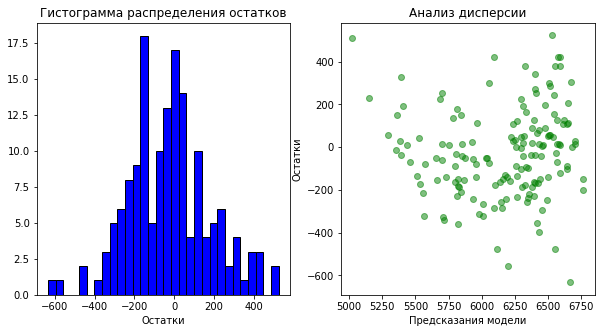

In [57]:
# Проведем анализ остатков
residuals_1 = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1 , bins=30, color='blue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_1 , alpha=0.5, color='green')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки нормально распределены, график имеет небольшое смещение. Анализ дисперсии показывает, что остатки распределены неравномерно. Есть вероятность, что модель неточно предсказывает значения целевого признака в интервале 5750-6250. R2 равен 0.78.

#####  Модель №2

In [58]:
ferma_m2 = ferma_main.copy()
ferma_m2['sugar_protein_ratio_cat'] = ferma_m2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_m2['square_energy_feed_unit'] = ferma_m2['energy_feed_unit'] ** 2

ferma_m2 = ferma_m2.drop(['id', 'protein_percent', 'fat_percent', 'milk_taste', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)
ferma_m2.head(1)

,milk_yield_kg,crude_protein_g,breed,pasture_type,sire_breed,age,sugar_protein_ratio_cat,square_energy_feed_unit
0,5863,1743,вис бик айдиал,равнинное,айдиал,более_2_лет,0,201.64


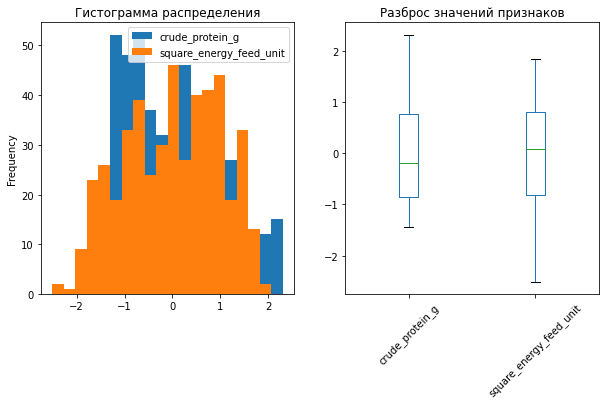

In [59]:
# Разабъем выборку на тренировочную и тестовую
RANDOM_STATE = 42

X = ferma_m2.drop(columns='milk_yield_kg')
y = ferma_m2['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['crude_protein_g', 'square_energy_feed_unit']

# Применим OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Применим StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построим гистограмму частотного распределения и ящик с усами для количественных признаков, 
# чтобы убедиться в правильности выполнения масштабирования.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [60]:
def preprocess_data(data, target_column, cat_columns, num_columns, random_state=42):

    X = data.drop(columns=target_column)
    y = data[target_column]
    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=random_state
    )
    
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_ohe = encoder.fit_transform(X_train[cat_columns])
    X_test_ohe = encoder.transform(X_test[cat_columns])
    encoder_col_names = encoder.get_feature_names_out()
    
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_columns])
    X_test_scaled = scaler.transform(X_test[num_columns])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)
    
    X_train_preprocessed = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test_preprocessed = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    X_train[num_columns].plot(kind='hist', bins=20, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    
    X_train[num_columns].plot(kind='box', ax=axes[1], rot=45)
    axes[1].set_title('Разброс значений признаков')
    
    plt.show()
    
    return X_train_preprocessed, X_test_preprocessed, y_train, y_test

In [61]:
# Обучим модель
model_lr  = LinearRegression()
model_lr = model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Посчитаем R2
r2_2 = r2_score(y_test, predictions)
print(f'R2 = {r2_2:.5f}')

MSE_2 = mean_squared_error(y_test, predictions)
MAE_2 = mean_absolute_error(y_test, predictions)
RMSE_2 = np.sqrt(MSE_2)

R2 = 0.81809


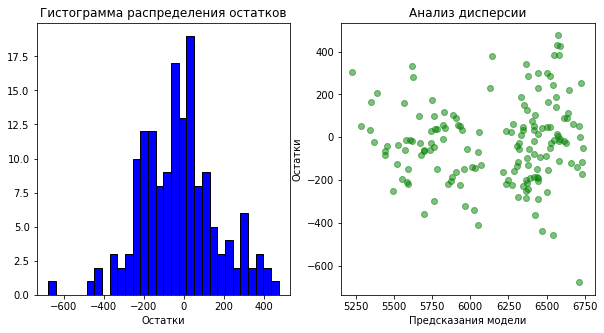

In [62]:
# Проведем анализ остатков
residuals_2 = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_2, alpha=0.5, color='green')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки распределены нормально, график — относительно симметричен от самого частого значения. Дисперсия остатков все еще неравномерная и на больших значнеиях увеличивается. R2 равен 0.818.

#####  Модель №3

In [63]:
def categorize_ratio(x):
    if x < 0.87:
        return 0  
    elif 0.87 <= x <= 0.91:
        return 1
    else:
        return 2

ferma_m3_1 = ferma_main.copy()
ferma_m3_1 = ferma_m3_1.merge(ferma_dad, on='id')

ferma_m3_1['sugar_protein_ratio_cat'] = ferma_m3_1['sugar_protein_ratio'].apply(categorize_ratio)
ferma_m3_1['square_energy_feed_unit'] = ferma_m3_1['energy_feed_unit'] ** 2

ferma_m3_1 = ferma_m3_1.drop(['id', 'protein_percent', 'fat_percent', 'milk_taste', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)
ferma_m3_1.head(1)

,milk_yield_kg,crude_protein_g,breed,pasture_type,sire_breed,age,sire_name,sugar_protein_ratio_cat,square_energy_feed_unit
0,5863,1743,вис бик айдиал,равнинное,айдиал,более_2_лет,буйный,1,201.64


In [64]:
print("Размерность ferma_main до слияния:", ferma_main.shape)
print("Размерность ferma_dad до слияния:", ferma_dad.shape)
print("Размерность после слияния:", ferma_m3_1.shape)

Размерность ferma_main до слияния: (628, 12)
Размерность ferma_dad до слияния: (629, 2)
Размерность после слияния: (628, 9)


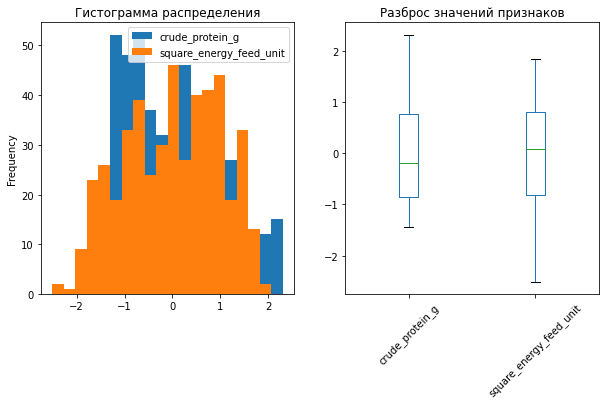

In [65]:
# Разабъем выборку на тренировочную и тестовую
RANDOM_STATE = 42

X = ferma_m3_1.drop(columns='milk_yield_kg')
y = ferma_m3_1['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat', 'sire_name']
num_col_names = ['crude_protein_g', 'square_energy_feed_unit']

# Применим OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Применим StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построим гистограмму частотного распределения и ящик с усами для количественных признаков, 
# чтобы убедиться в правильности выполнения масштабирования.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [66]:
# Обучим модель
model_lr  = LinearRegression()
model_lr_best = model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Посчитаем R2
r2_3_1 = r2_score(y_test, predictions)
print(f'R2 = {r2_3_1:.5f}')

MSE_3_1 = mean_squared_error(y_test, predictions)
MAE_3_1 = mean_absolute_error(y_test, predictions)
RMSE_3_1 = np.sqrt(MSE_3_1)

R2 = 0.82419


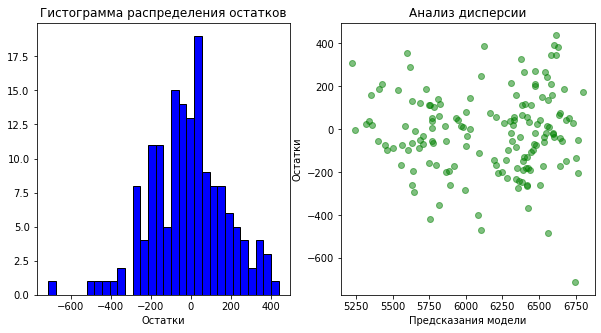

In [67]:
# Проведем анализ остатков
residuals_3_1 = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3_1, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_3_1, alpha=0.5, color='green')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки нормально распределены, график — относительно симметричен от самого частого значения. Дисперсия остатков почти не изменилась по сравнению с предыдущей моделью. R2 равен 0.8247 (метрика еще сильнееувеличилась по сравнению с прошлой моделью - наилучший результат).

In [68]:
ferma_m3_2 = ferma_main.copy()
ferma_m3_2 = ferma_m3_2.merge(ferma_dad, on='id') 

ferma_m3_2['sugar_protein_ratio_cat'] = ferma_m3_2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_m3_2['square_energy_feed_unit'] = ferma_m3_2['energy_feed_unit'] ** 2


ferma_m3_2 = ferma_m3_2.drop(['id', 'protein_percent', 'fat_percent', 'milk_taste', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)
ferma_m3_2.head(1)

,milk_yield_kg,crude_protein_g,breed,pasture_type,sire_breed,age,sire_name,sugar_protein_ratio_cat,square_energy_feed_unit
0,5863,1743,вис бик айдиал,равнинное,айдиал,более_2_лет,буйный,0,201.64


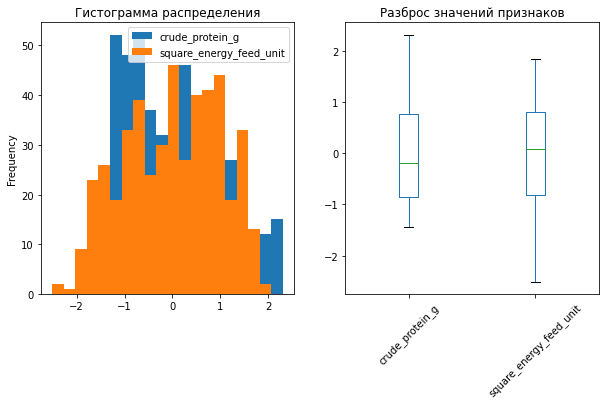

In [69]:
# Разабъем выборку на тренировочную и тестовую
RANDOM_STATE = 42

X = ferma_m3_2.drop(columns='milk_yield_kg')
y = ferma_m3_2['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat', 'sire_name']
num_col_names = ['crude_protein_g', 'square_energy_feed_unit']

# Применим OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Применим StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построим гистограмму частотного распределения и ящик с усами для количественных признаков, 
# чтобы убедиться в правильности выполнения масштабирования.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [70]:
# Обучим модель
model_lr  = LinearRegression()
model_lr = model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Посчитаем R2
r2_3_2 = r2_score(y_test, predictions)
print(f'R2 = {r2_3_2:.5f}')

MSE_3_2 = mean_squared_error(y_test, predictions)
MAE_3_2 = mean_absolute_error(y_test, predictions)
RMSE_3_2 = np.sqrt(MSE_3_2)

R2 = 0.82475


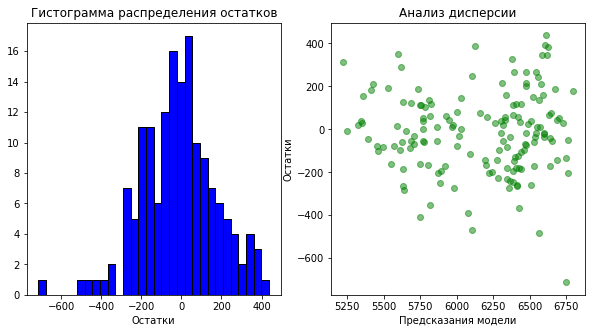

In [71]:
# Проведем анализ остатков
residuals_3_2 = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3_2, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_3_2, alpha=0.5, color='green')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

##### Сравнение моделей

In [72]:
print(f'r2_score модели №1: {r2_1}')
print(f'r2_score модели №2: {r2_2}')
print(f'r2_score модели №3_1: {r2_3_1}')
print(f'r2_score модели №3_2: {r2_3_2}\n')

print(f'Остатки модели №1 (средние): {residuals_1.mean()}')
print(f'Остатки модели №2 (средние): {residuals_2.mean()}')
print(f'Остатки модели №3_1 (средние): {residuals_3_1.mean()}')
print(f'Остатки модели №3_2 (средние): {residuals_3_2.mean()}')

r2_score модели №1: 0.7844078173416967
r2_score модели №2: 0.8180879926867501
r2_score модели №3_1: 0.8241851866885548
r2_score модели №3_2: 0.8247542745210407

Остатки модели №1 (средние): -25.37328620820117
Остатки модели №2 (средние): -24.372798135531905
Остатки модели №3_1 (средние): -15.286068591076726
Остатки модели №3_2 (средние): -15.201522000920948


Наилучший R2 у 3 модели, но у 1 наименьшие остатки.

In [73]:
print(f'MSE модели №1: {MSE_1}')
print(f'MSE модели №2: {MSE_2}')
print(f'MSE модели №3_1: {MSE_3_1}')
print(f'MSE модели №3_2: {MSE_3_2}\n')

print(f'MAE модели №1: {MAE_1}')
print(f'MAE модели №2: {MAE_2}')
print(f'MAE модели №3_1: {MAE_3_1}')
print(f'MAE модели №3_2: {MAE_3_2}\n')

print(f'RMSE модели №1: {RMSE_1}')
print(f'RMSE модели №2: {RMSE_2}')
print(f'RMSE модели №3_1: {RMSE_3_1}')
print(f'RMSE модели №3_2: {RMSE_3_2}\n')      

confidence_level = 0.95
ci_low, ci_high = st.norm.interval(confidence_level, loc=np.mean(predictions), scale=st.sem(predictions))
print(f"Доверительный интервал (95%): [{ci_low:.3f}, {ci_high:.3f}]")

MSE модели №1: 43887.015009660514
MSE модели №2: 37030.91131113695
MSE модели №3_1: 35789.73623060021
MSE модели №3_2: 35673.88988618193

MAE модели №1: 164.24194463474925
MAE модели №2: 149.03965222364596
MAE модели №3_1: 146.33333597087298
MAE модели №3_2: 146.1630244536231

RMSE модели №1: 209.4922791170608
RMSE модели №2: 192.43417396901452
RMSE модели №3_1: 189.18175448652602
RMSE модели №3_2: 188.87532895055915

Доверительный интервал (95%): [6092.340, 6221.375]


Наилучшии показатели у модели №3_2.

##### Прогноз удоя коров, которых фермер хочет купить

In [74]:
ferma_m4 = cow_buy.copy()

new_values = ferma_main[['energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio']].mean() * 1.05

ferma_m4['energy_feed_unit'] = new_values['energy_feed_unit']
ferma_m4['square_energy_feed_unit'] = ferma_m4['energy_feed_unit'] ** 2
ferma_m4['crude_protein_g'] = new_values['crude_protein_g']
ferma_m4['sugar_protein_ratio'] = new_values['sugar_protein_ratio']
ferma_m4['sugar_protein_ratio_cat'] = ferma_m4['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)


ferma_m4 = ferma_m4.drop(['current_protein_percent', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)
ferma_m4.head(1)

,breed,pasture_type,sire_breed,sire_name,current_fat_percent,age,square_energy_feed_unit,crude_protein_g,sugar_protein_ratio_cat
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,более_2_лет,233.361138,2019.947532,1


In [75]:
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat', 'sire_name']
num_col_names = ['crude_protein_g', 'square_energy_feed_unit']

X_test_ohe = encoder.transform(ferma_m4[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_test_scaled = scaler.transform(ferma_m4[num_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [76]:
predicted_yield = model_lr.predict(X_test_full)
predicted_yield

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

In [77]:
cow_buy['expected_milk_yield'] = predicted_yield
cow_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percent,current_protein_percent,age,expected_milk_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6378.711028
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.089377
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6542.146066
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6425.380218
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6571.259737
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668


**Было создано три модели. Из них была выбрана лучшая с показателями:**
- r2_score модели №3: 0.82475;
- Остатки модели №3 (средние): -15.201522000920948;
- MSE модели №3: 35673.88988618193;
- MAE модели №3: 146.1630244536231;
- RMSE модели №3: 188.87532895055915;
- Доверительный интервал (95%): [6092.340, 6221.375]

**Были получены предсказания для всех коров продавца. Удой всех коров больше 6000. Осталось предсказать, молоко каких коров будет вкусным.**

#### Шаг 6. Обучение модели логистической регрессии

##### Создание модели  логистической регрессии

In [78]:
ferma_mlog = ferma_main.copy()

ferma_mlog['milk_taste_cat'] = ferma_mlog['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_mlog['sugar_protein_ratio_cat'] = ferma_mlog['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_mlog['square_energy_feed_unit'] = ferma_mlog['energy_feed_unit'] ** 2

ferma_mlog = ferma_mlog.drop(['id', 'milk_taste', 'sugar_protein_ratio', 'energy_feed_unit', 'milk_yield_kg'], axis=1)
ferma_mlog.head(1)

,crude_protein_g,breed,pasture_type,sire_breed,fat_percent,protein_percent,age,milk_taste_cat,sugar_protein_ratio_cat,square_energy_feed_unit
0,1743,вис бик айдиал,равнинное,айдиал,3.58,3.076,более_2_лет,1,0,201.64


In [79]:
# Разобъем выборку на тренировочную и тестовую
RANDOM_STATE = 42

X = ferma_mlog.drop(columns=['milk_taste_cat'])
y = ferma_mlog['milk_taste_cat']

 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['crude_protein_g', 'protein_percent', 'square_energy_feed_unit', 'fat_percent']

# Применим OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Применим StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Обучим модель
clf = LogisticRegression() 

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

##### Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision

In [80]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 

print('accuracy:', round(accuracy,3))
print('recall: ',round(recall,3))
print('precision: ',round(precision,3))

accuracy: 0.624
recall:  0.852
precision:  0.62


##### Построим матрицу ошибок

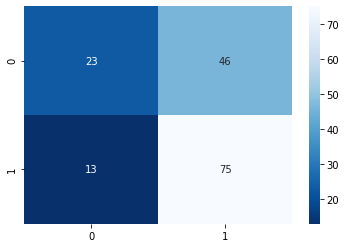

In [81]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

##### Анализ модели 

Для заказчика важно вкусное молоко, а значит, ошибка первого рода (FP) более критична: она может нанести прямой ущерб за счет выбора некачественной коровы.

Recall (полнота): Показывает, насколько хорошо модель "захватывает" все случаи вкусного молока (уменьшает FN).
Precision (точность): Показывает, сколько из предсказанных моделью "вкусных" случаев действительно являются таковыми (уменьшает FP). Для нашей задачи важнее Precision, чтобы минимизировать вероятность покупки коровы, которая даст невкусное молоко.

Accuracy = 0.624. Это означает, что модель верно предсказывает примерно 62.4% случаев. Это не слишком высокий показатель. 

На основании вашей матрицы ошибок:

False Positive (FP): 46 случаев — модель ошибочно предсказывает "вкусное молоко", но на самом деле оно невкусное.

False Negative (FN): 13 случаев — модель ошибочно предсказывает "невкусное молоко", хотя оно на самом деле вкусное.

True Negative (TN): Модель правильно предсказала 23 случая, когда молоко невкусное.

True Positive (TP): Модель правильно предсказала 75 случаев, когда молоко вкусное.

Наш фокус должен быть на минимизации False Positive, даже если это приведет к увеличению False Negative (т.е., пропуску некоторых "вкусных" коров).

Оптимальный порог: 0.795
Precision: 1.000
Recall: 0.091


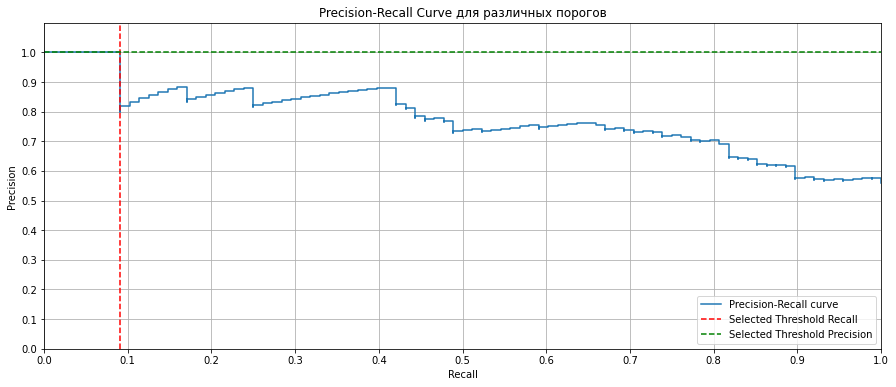

In [82]:
y_proba = clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

pr_curve_data = pd.DataFrame({
    'threshold': np.append(thresholds, 1),  
    'precision': precision,
    'recall': recall
})

# Найдем оптимальный порог для максимизации Precision
optimal_threshold = pr_curve_data.loc[pr_curve_data['precision'].idxmax(), 'threshold']

# Вычислим новые метрики при этом пороге
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)
new_precision = precision_score(y_test, y_pred_adjusted)
new_recall = recall_score(y_test, y_pred_adjusted)

print(f"Оптимальный порог: {optimal_threshold:.3f}")
print(f"Precision: {new_precision:.3f}")
print(f"Recall: {new_recall:.3f}")

# График Precision-Recall curve
plt.figure(figsize=(15, 6))
plt.step(recall, precision, where='post', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.axvline(x=new_recall, color='r', linestyle='--', label='Selected Threshold Recall')
plt.axhline(y=new_precision, color='g', linestyle='--', label='Selected Threshold Precision')
plt.legend()
plt.title('Precision-Recall Curve для различных порогов')
plt.show()

In [83]:
optimal_threshold = 0.795

y_pred_new = (y_proba >= optimal_threshold).astype(int)

accuracy_new = accuracy_score(y_test, y_pred_new)
recall_new = recall_score(y_test, y_pred_new)
precision_new = precision_score(y_test, y_pred_new)

print('accuracy:', round(accuracy_new, 3))
print('recall: ', round(recall_new, 3))
print('precision: ', round(precision_new, 3))

accuracy: 0.49
recall:  0.091
precision:  1.0


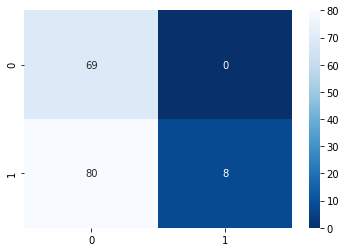

In [84]:
cm = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Precision: 1.0 — высокий показатель точности, означает, что модель практически не допускает ложных срабатываний (False Positive). Это соответствует поставленной задаче минимизировать FP.

Матрица ошибок:
Модель полностью избегает ошибок первого рода (False Positive), что подтверждается отсутствием предсказанных "вкусных" коров среди невкусных.Однако большое количество ошибок второго рода (False Negative) (76 примеров) указывает на сильное снижение Recall.

##### Прогноз вкуса молока коров

In [86]:
ferma_mlog2 = cow_buy.copy()

ferma_mlog2['energy_feed_unit'] = new_values['energy_feed_unit']
ferma_mlog2['square_energy_feed_unit'] = ferma_mlog2['energy_feed_unit'] ** 2
ferma_mlog2['crude_protein_g'] = new_values['crude_protein_g']
ferma_mlog2['sugar_protein_ratio'] = new_values['sugar_protein_ratio']
ferma_mlog2['sugar_protein_ratio_cat'] = ferma_mlog2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)


ferma_mlog2.rename(columns={'current_fat_percent': 'fat_percent', 'current_protein_percent': 'protein_percent'}, inplace=True)
ferma_mlog2 = ferma_mlog2.drop(['sire_name', 'sugar_protein_ratio', 'energy_feed_unit'], axis=1)

ferma_mlog2.head()

,breed,pasture_type,sire_breed,fat_percent,protein_percent,age,expected_milk_yield,square_energy_feed_unit,crude_protein_g,sugar_protein_ratio_cat
0,вис бик айдиал,холмистое,айдиал,3.58,3.076,более_2_лет,6609.919297,233.361138,2019.947532,1
1,вис бик айдиал,равнинное,соверин,3.54,3.081,менее_2_лет,6378.711028,233.361138,2019.947532,1
2,рефлешнсоверинг,равнинное,соверин,3.59,3.074,более_2_лет,6283.999775,233.361138,2019.947532,1
3,рефлешнсоверинг,холмистое,айдиал,3.40,3.061,более_2_лет,6593.089377,233.361138,2019.947532,1
4,рефлешнсоверинг,равнинное,айдиал,3.64,3.074,более_2_лет,6542.146066,233.361138,2019.947532,1


In [87]:
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['crude_protein_g', 'protein_percent', 'square_energy_feed_unit', 'fat_percent']

X_test_ohe = encoder.transform(ferma_mlog2[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_test_scaled = scaler.transform(ferma_mlog2[num_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [88]:
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > optimal_threshold).astype(int)
predictions_final = le.inverse_transform(predictions_final)

In [89]:
cow_buy['expected_milk_taste'] = predictions_final
cow_buy['expected_milk_taste'] = cow_buy['expected_milk_taste'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = cow_buy.query('expected_milk_taste == "вкусно" & expected_milk_yield > 6000')
cow_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percent,current_protein_percent,age,expected_milk_yield,expected_milk_taste
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,не вкусно
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6378.711028,не вкусно
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.089377,не вкусно
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6542.146066,не вкусно
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6425.380218,не вкусно
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6609.919297,не вкусно
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6571.259737,не вкусно
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,6283.999775,не вкусно
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6400.540668,не вкусно


In [90]:
to_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percent,current_protein_percent,age,expected_milk_yield,expected_milk_taste


0 коров оказались со вкусным молоком и удоем больше 6000.

#### Шаг 7. Итоговые выводы

В ходе выполнения работы были разработаны модели машинного обучения, которые позволят заказчику принять объективное решение о выборе коров для покупки (прогнозируемый удой > 6000, вкусное молоко). По результатам работы модели к покупке не была  рекомендована ни одна корова.

В ходе корреляционного анализа были выявлены закономерности. Удой - целевой признак, корреляция между ним и другими признаками:

- ЭКЕ: сильная зависимость, с увеличением "удоя" постепенно увеличивается и ЭКЕ. Это справедливо для обеих пород;
- жирность: сильная положительная зависимость;
- СПО: есть зависимость с целевым признаком, на диаграмме рассеяния заметен разброс разброс значений на две группы (удой до 6000 кг - СПО < 0.9, удой больше 6000 кг - СПО > 0.93);
- сырой протеин: связь умеренно положительная, на диаграмме рассеяния виден довольно большой разброс значений;
- белок: слабая корреляция;
- порода папы_быка: умеренная корреляция.

В основном связь между признаками линейная. Но СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера. Чтобы устранить нелинейность,  СПО было преобразовано в категориальный бинарный признак. ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними была исключена посредством введения нового признака -  ЭКЕ в квадрате.

Было построено три модели линейной регрессии и выбрана лучшая из них для прогнозирования удоя. Показатели лучшей модели:
- MSE модели №3: 35673.88988618193;
- MAE модели №3: 146.1630244536231;
- RMSE модели №3: 188.87532895055915;
- Доверительный интервал (95%): [6092.340, 6221.375].

Для улучшения модели были изменены некоторые признаки.  СПО было преобразовано в категориальный бинарный признак. ЭКЕ было изменено ЭКЕ в квадрате, чтобы устранить нелинейность. Был добавлен новый признак - имя_папы. 

Была построена модель логистической регрессии, чтобы решить задачу классификация по выбору вкусного молока. Модель была проанализирована, количество критических ошибок FP было снижено до 0. 
В данной задаче для заказчика важно вкусное молоко, а значит, ошибка первого рода (FP) более критична: она может нанести прямой ущерб за счет выбора некачественной коровы. Precision: показывает, сколько из предсказанных моделью "вкусных" случаев действительно являются таковыми (уменьшает FP). Для нашей задачи важнее Precision, чтобы минимизировать вероятность покупки коровы, которая даст невкусное молоко.

Рекомендации фермеру:
Для максимального увеличения продуктивности уделять внимание кормам с высоким содержанием сырого протеина, СПО и ЭКЕ, так как эти показатели сильно коррелируют с удоем.